In [1]:
import MDAnalysis as mda
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_RMSF(system, name):
    u = mda.Universe('GRO/{0:s}_v1_nowat.gro'.format(system),'XTC/{0:s}_v1_nowat_fit.xtc'.format(system))
    np.unique(u.select_atoms('protein').resids)
    n_residus = max(np.unique(u.select_atoms('protein').resids))
    D = []
    for r in range(1,4):
        D.append(np.loadtxt('RMSF/{0:s}_v{1:d}_nowat_BB_rmsf.xvg'.format(system, r), comments=('#','@')))
    data = np.array(D)
    chainA_all = data[:, :n_residus, 1]
    chainB_all = data[:, n_residus:, 1]
    mean_A = np.mean(chainA_all, axis=0)
    mean_B = np.mean(chainB_all, axis= 0)
    std_A = np.std(chainA_all, axis=0)
    std_B = np.std(chainB_all, axis=0)
    plt.plot(range(n_residus), mean_A, color='#8da0cb', label='chain A')
    plt.plot(range(n_residus), mean_B, color='#fc8d62', label='chain B')
    plt.errorbar(range(n_residus), mean_A, yerr=std_A, color='#8da0cb', alpha=0.5)
    plt.errorbar(range(n_residus), mean_B, yerr=std_B, color='#fc8d62', alpha=0.5)
    plt.grid()
    plt.ylim(0,1.6)
    plt.xlabel('Resid')
    plt.ylabel('RMS Fluctuation (nm)')
    plt.title(name)
    plt.legend(loc='upper left', frameon=False)
    plt.tight_layout()
    plt.savefig('RMSF/'+system+'_RMSF_plot.png', dpi=600)
    plt.show()
    return

/home/au447022/anaconda3/envs/py2.7/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/envs/py2.7/lib/python2.7/site-packages/MDAnalysis/topology/guessers.py:72: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


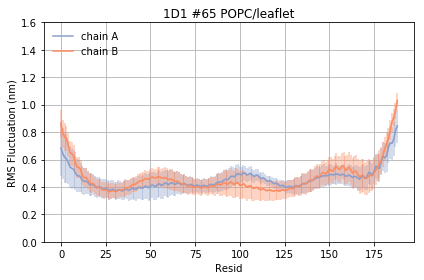

In [3]:
plot_RMSF('1D1_65', '1D1 #65 POPC/leaflet')

In [4]:
systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_85', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90', 'NW11_99', 'NW11_110', 'NW9_54', 'NWLA_150', '1E3D1_134']
#systems = ['1D1_60', '1D1_65', '1D1_70', '1D1_75', '1D1_80', '1D1_90', 'NW11_70', 'NW11_80', 'NW11_90', 'NW11_99', 'NW11_110']

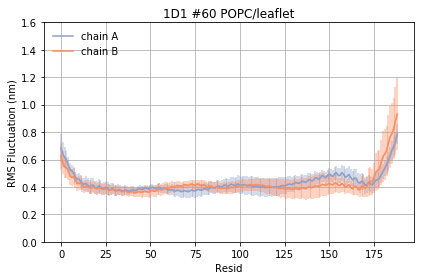

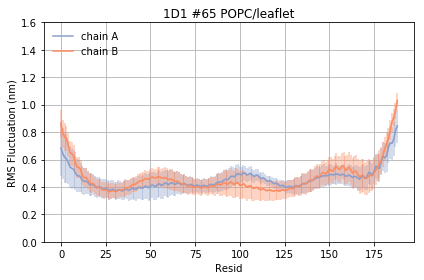

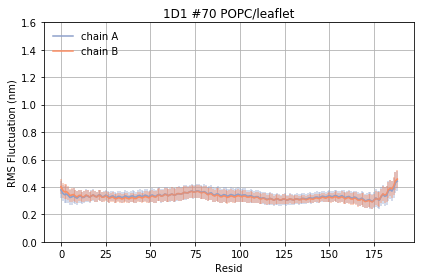

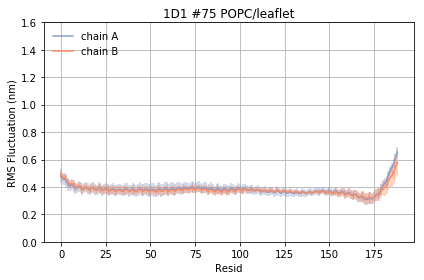

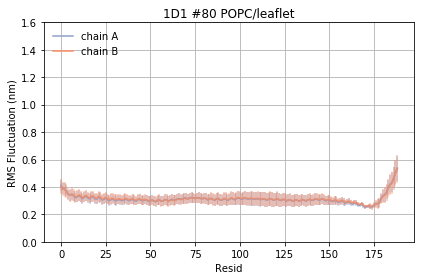

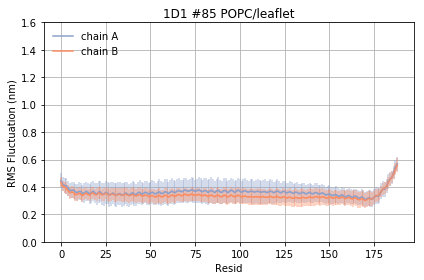

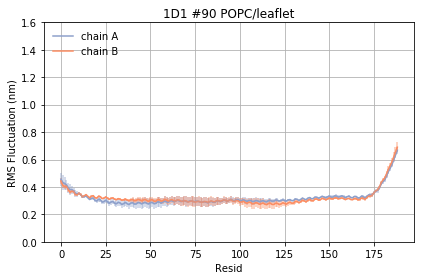

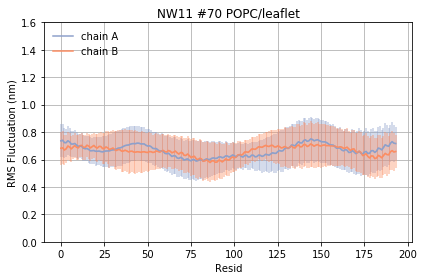

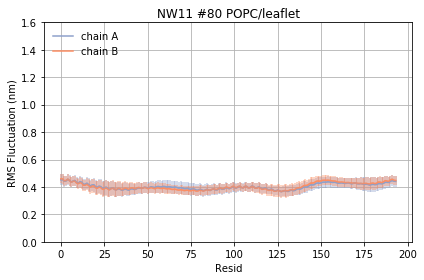

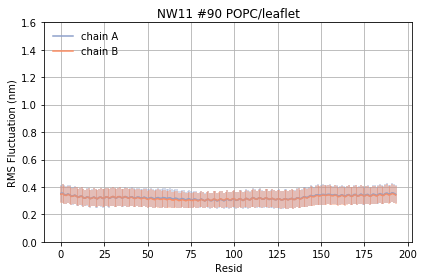

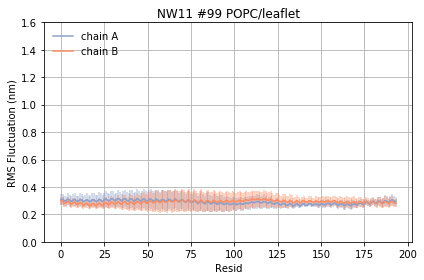

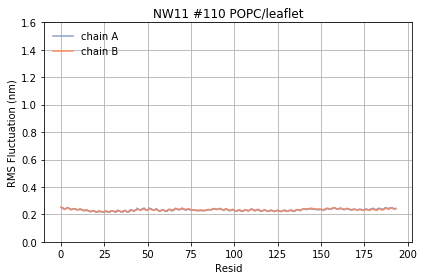

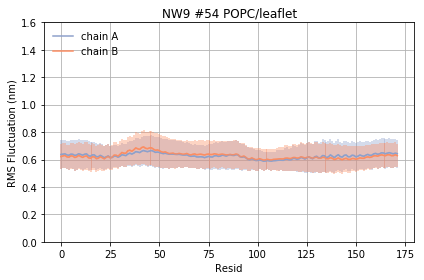

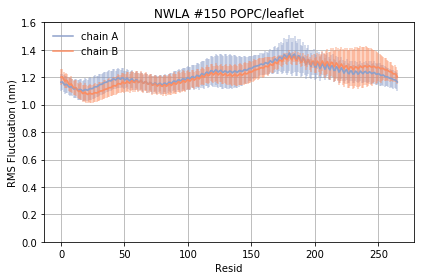

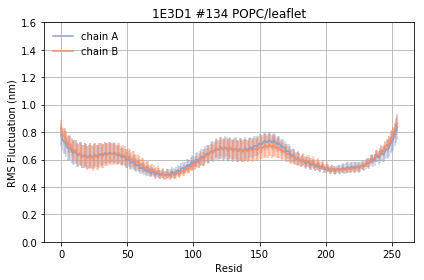

In [5]:
for s in systems:
    name='{0:s} #{1:s} POPC/leaflet'.format(s.split('_')[0], s.split('_')[1])
    plot_RMSF(s, name)